In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.patches import Rectangle

In [2]:
# Read in the data
df = pd.read_csv('../Data/data_clean.csv',
                 parse_dates=['Date', 'Date of Birth'],
                 delimiter=';',
                 )

In [3]:
# Define distances for each event in kilometers
distance_km = {
    '100 m': 0.1,
    '200 m': 0.2,
    '400 m': 0.4,
    '800 m': 0.8,
    '1500 m': 1.5,
    '5000 m': 5,
    '10,000 m': 10,
    'Half marathon': 21.0975,
    'Marathon': 42.195
}

# Calculate pace in minutes per kilometer
df['Pace_min_km'] = (df['Time_s'] / 60) / df['Event'].map(distance_km)

# Split df by gender
grouped = df.groupby('Gender')

# Extracting each group into a separate DataFrame
men_df = grouped.get_group('Men')
woman_df = grouped.get_group('Women')

sorted_events_by_distance = sorted(distance_km.keys(), key=lambda x: distance_km[x])

In [4]:
df


,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Time_s,Age,Pace_min_km
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m,100.91,23.742466,2.102292
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m,101.01,21.712329,2.104375
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m,101.09,21.693151,2.106042
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m,101.11,26.717808,2.106458
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m,101.24,26.687671,2.109167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18236,1000,00:03:33.250000,Noureddine Morceli,ALG,1970-02-28,1.0,Moskva,1995-06-05,Men,1500 m,213.25,25.282192,2.369444
18237,1000,00:03:33.250000,Paul Korir,KEN,1977-07-15,5.0,Zürich,2003-08-15,Men,1500 m,213.25,26.101370,2.369444
18238,1000,00:03:33.250000,Hudson Santos de Souza,BRA,1977-02-25,5.0,Rieti,2005-08-28,Men,1500 m,213.25,28.523288,2.369444
18239,1000,00:03:33.250000,Issac Songok,KEN,1984-04-25,2.0,Stockholm,2006-07-25,Men,1500 m,213.25,22.263014,2.369444


In [5]:
df["Gender"].head()

0    Men
1    Men
2    Men
3    Men
4    Men
Name: Gender, dtype: object

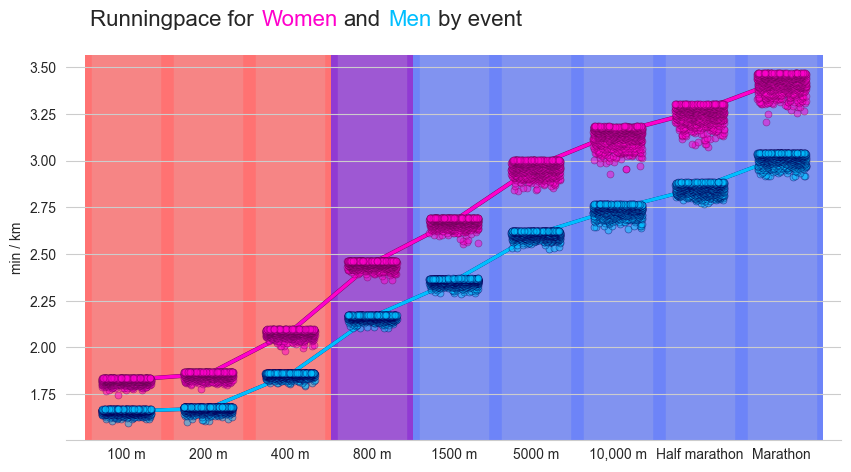

In [223]:
f, ax = plt.subplots(figsize=(10, 5))

common_xticks = ['100 m', '200 m', '400 m', '800 m', '1500 m', '5000 m', '10,000 m', 'Half marathon', 'Marathon']

title_start = "Runningpace for"
title_colored_women = "Women"
title_middle = "and"
title_colored_men = "Men"
title_end = "by event"

# Set each part of the title with different colors
txt_pos_start = 1.55
txt_pos_women = txt_pos_start + 0.1
txt_pos_middle = txt_pos_women + 1
txt_pos_men = txt_pos_middle + 0.55
txt_pos_end = txt_pos_men + 0.6
txt_pos_vert = 3.7
ax.text(txt_pos_start, txt_pos_vert, title_start, ha='right', va='bottom', fontsize=16)
ax.text(txt_pos_women, txt_pos_vert, title_colored_women, ha='left', va='bottom', color='#ff00cc', fontsize=16)
ax.text(txt_pos_middle, txt_pos_vert, title_middle, ha='left', va='bottom', fontsize=16)
ax.text(txt_pos_men, txt_pos_vert, title_colored_men, ha='left', va='bottom', color='#00bfff', fontsize=16)
ax.text(txt_pos_end, txt_pos_vert, title_end, ha='left', va='bottom', fontsize=16)


# --------------------------------------------Men-------------------------------------------

# add stripplot
ax = sns.stripplot(x='Event', y='Pace_min_km', data=men_df, color="#00bfff", order=sorted_events_by_distance, jitter=0.3, size=5, linewidth=0.5, edgecolor='#05005c', alpha=0.5, zorder=52)


# Calculate the median pace for each event to plot the trend line
median_pace_by_event = men_df.groupby('Event')['Pace_min_km'].median().reset_index()

# Sort the median pace data by event length
median_pace_by_event['Event'] = pd.Categorical(median_pace_by_event['Event'], categories=sorted_events_by_distance, ordered=True)
median_pace_by_event = median_pace_by_event.sort_values('Event')

# Calculate new x-coordinates for the line plot
new_x_coords = [i for i in range(len(sorted_events_by_distance))]

# Add the trend line for the median pace of each event
sns.lineplot(x=new_x_coords, y='Pace_min_km', data=median_pace_by_event, marker="", ax=ax, color= '#00bfff', linewidth=2.5, zorder=51)
sns.lineplot(x=new_x_coords, y='Pace_min_km', data=median_pace_by_event, marker="", ax=ax, color= '#05005c', linewidth=2.5, zorder=50)


# Shift the line to the middle of the boxes
for line in ax.lines:
    xdata = line.get_xdata()
    ydata = line.get_ydata()
# --------------------------------------------Women-------------------------------------------

# add stripplot
ax = sns.stripplot(x='Event', y='Pace_min_km', data=woman_df, color="#ff00cc", order=sorted_events_by_distance, jitter=0.3, size=5, linewidth=0.5, edgecolor='#6e0058', alpha=0.5, zorder=52)


# Calculate the median pace for each event to plot the trend line
median_pace_by_event = woman_df.groupby('Event')['Pace_min_km'].median().reset_index()

# Sort the median pace data by event length
median_pace_by_event['Event'] = pd.Categorical(median_pace_by_event['Event'], categories=sorted_events_by_distance, ordered=True)
median_pace_by_event = median_pace_by_event.sort_values('Event')

# Calculate new x-coordinates for the line plot
new_x_coords = [i for i in range(len(sorted_events_by_distance))]

# Add the trend line for the median pace of each event
sns.lineplot(x=new_x_coords, y='Pace_min_km', data=median_pace_by_event, marker="", ax=ax, color= '#6e0058', linewidth=3, zorder=50)
sns.lineplot(x=new_x_coords, y='Pace_min_km', data=median_pace_by_event, marker="", ax=ax, color= '#ff00cc', linewidth=2.5, zorder=51)


# Set and modify the bottom (x-axis) ticks and tick-labels
ax.set_xticks(common_xticks)
ax.tick_params(axis='x', labelsize='medium', pad=2)


ax = plt.gca()  # Get current axis
ax.xaxis.grid(True, linestyle='-', linewidth=50, color='lightgrey', alpha=0.2, zorder=1)  # Enable x-axis grid lines

# Get the gridlines of the x-axis
xgridlines = ax.get_xgridlines()

# Hide the x-axis label
ax.set_xlabel('')

# Set the y-axis label
ax.set_ylabel('min / km')

# step 1: define the rectangle
ar1 = Rectangle(xy=(-0.5,0), width=3, height=3000, # data coordinates by default
               facecolor="#ff4f4f", zorder=0,
               linewidth=0, alpha=0.8)
ar2 = Rectangle(xy=(2.5,0), width=1, height=3000, # data coordinates by default
               facecolor="#7608c9", zorder=0,
               linewidth=0, alpha=0.8)
ar3 = Rectangle(xy=(3.5,0), width=5, height=3000, # data coordinates by default
               facecolor="#4865f7", zorder=0,
               linewidth=0, alpha=0.8)

# step 2: add the rectangle to our chart object
ax.add_patch(ar1)
ax.add_patch(ar2)
ax.add_patch(ar3)

sns.despine(left=True, top=True, right=True)
# plt.tight_layout()

plt.show()